In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, make_scorer, plot_roc_curve
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split

from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

# STYLE
plt.style.use('seaborn-ticks')
# SVG
set_matplotlib_formats('svg')

/tmp/ipykernel_33192/464768573.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [96]:
X = np.load('data/data_2/X.npy').astype(np.int8)
y = np.load('data/data_2/y.npy').astype(np.int8)

In [7]:
np.unique(y, return_counts=True)

(array([1, 2], dtype=int8), array([305, 923]))

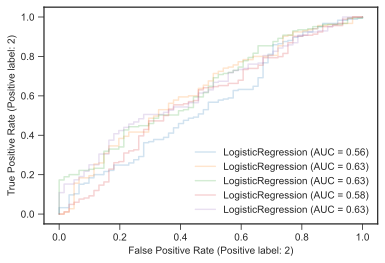

In [49]:
clf = LogisticRegression(penalty='l2',
                         C=0.01,
                         class_weight='balanced',
                         n_jobs=-1)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_curves = []
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    clf.fit(X_train, y_train)
    ax = plt.gca()
    roc_curves.append(plot_roc_curve(clf, X_val, y_val, ax=ax))

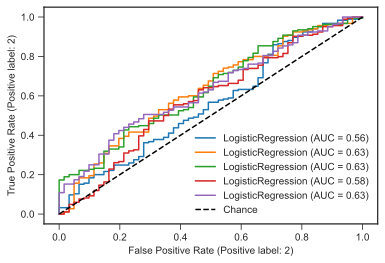

In [91]:
for roc_curve in roc_curves:
    ax = plt.gca()
    roc_curve.plot(ax=ax)
plt.plot(np.linspace(0, 1), np.linspace(0, 1), label='Chance', linestyle='--', c='black')
plt.legend(loc='lower right');

In [97]:
y = np.where(y==1, 0, 1)
np.unique(y)

array([0, 1])

[05:03:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:06:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:09:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:11:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

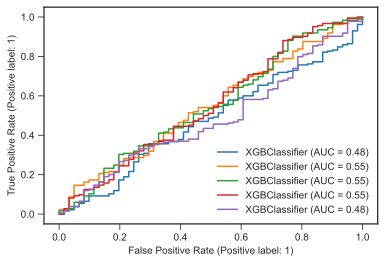

In [98]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=1, gamma=0,
                    learning_rate=0.1, max_delta_step=0, max_depth=3,
                    min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
                    nthread=None, objective='binary:logistic',
                    predictor='gpu_predictor', random_state=0, reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=0.3, seed=None, silent=None,
                    subsample=1.0, use_label_encoder=False, verbosity=1)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_curves = []
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    clf.fit(X_train, y_train)
    ax = plt.gca()
    roc_curves.append(plot_roc_curve(clf, X_val, y_val, ax=ax))

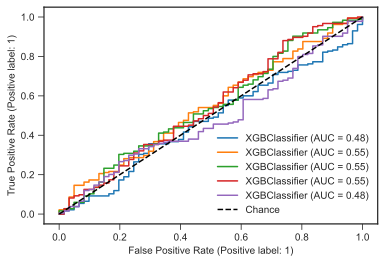

In [99]:
for roc_curve in roc_curves:
    ax = plt.gca()
    roc_curve.plot(ax=ax)
plt.plot(np.linspace(0, 1), np.linspace(0, 1), label='Chance', linestyle='--', c='black')
plt.legend(loc='lower right');